**Installing all the required libraries and modules**

In [5]:
!python -m pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.5/1.8 MB 2.1 MB/s eta 0:00:01
   ----------------- ---------------------- 0.8/1.8 MB 1.2 MB/s eta 0:00:01
   ----------------- ---------------------- 0.8/1.8 MB 1.2 MB/s eta 0:00:01
   ---------------------- ----------------- 1.0/1.8 MB 837.0 kB/s eta 0:00:01
   ---------------------- ----------------- 1.0/1.8 MB 837.0 kB/s eta 0:00:01
   ---------------------- ----------------- 1.0/1.8 MB 837.0 kB/s eta 0:00:01
   ---------------------------- ----------- 1.3/1.8 MB 671.4 kB/s eta 0:00:01
   ---------------------------- ----------- 1.3/1.8 MB 671.4 kB/s eta 0:00:01
   ---------------------------------- ----- 1.6/1.8 MB 659.8 kB/s eta 0:00:01
   -------------------------

In [6]:
pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


**Import all important modules and libraries**

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Optional settings (recommended)
sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None


**Loading the Dataset**

In [21]:
df = pd.read_csv("Uncleaned Laptop Price Dataset/laptopData.csv")

**Print the first 5 rows of the dataset**

In [22]:
print(df.head())

   Unnamed: 0 Company   TypeName Inches                    ScreenResolution  \
0         0.0   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   
1         1.0   Apple  Ultrabook   13.3                            1440x900   
2         2.0      HP   Notebook   15.6                   Full HD 1920x1080   
3         3.0   Apple  Ultrabook   15.4  IPS Panel Retina Display 2880x1800   
4         4.0   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight        Price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
1        Intel HD Graphics 6000  macOS  

**Data Cleaning**

In [26]:
# ✅ Drop "Unnamed: 0" column if it exists
df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

# ✅ Replace '?' with NaN and drop missing rows
df.replace('?', np.nan, inplace=True)
df.dropna(subset=['Inches', 'Weight'], inplace=True)

# ✅ Clean and convert 'Price'
df['Price'] = df['Price'].astype(str).str.replace(',', '', regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# ✅ Clean and convert 'Ram'
df['Ram'] = df['Ram'].astype(str).str.replace('GB', '', regex=False)
df['Ram'] = pd.to_numeric(df['Ram'], errors='coerce')

# ✅ Clean and convert 'Weight'
df['Weight'] = df['Weight'].astype(str).str.replace('kg', '', regex=False)
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')
df['Weight'] = df['Weight'].fillna(df['Weight'].mean())

# ✅ Convert 'Inches' to float
df['Inches'] = pd.to_numeric(df['Inches'], errors='coerce')

# ✅ Extract brand name
df['Brand'] = df['Company'].str.split().str[0]

# ✅ Extract CPU brand if 'Cpu' exists
if 'Cpu' in df.columns:
    df['Cpu Brand'] = df['Cpu'].str.split().str[0]
    df.drop(['Cpu'], axis=1, inplace=True, errors='ignore')

# ✅ Create Touchscreen and IPS columns
df['Touchscreen'] = df['ScreenResolution'].astype(str).str.contains('Touchscreen', case=False).astype(int)
df['IPS'] = df['ScreenResolution'].astype(str).str.contains('IPS', case=False).astype(int)

# ✅ Extract resolution and calculate PPI
resolution = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)', expand=True)
df['X_res'] = pd.to_numeric(resolution[0], errors='coerce')
df['Y_res'] = pd.to_numeric(resolution[1], errors='coerce')
df['ppi'] = (((df['X_res'] ** 2 + df['Y_res'] ** 2) ** 0.5) / df['Inches']).round(2)
df.drop(['ScreenResolution', 'X_res', 'Y_res'], axis=1, inplace=True)

# ✅ Clean and split 'Memory' column into SSD, HDD, Flash, Hybrid
df['Memory'] = df['Memory'].astype(str).str.upper().str.replace(' ', '')

# Create columns for different storage types
df['SSD'] = df['Memory'].str.extract(r'(\d+)GBSSD').fillna(0).astype(int)
df['HDD'] = df['Memory'].str.extract(r'(\d+)GBHDD').fillna(0).astype(int)
df['Flash_Storage'] = df['Memory'].str.extract(r'(\d+)GBFLASH').fillna(0).astype(int)
df['Hybrid'] = df['Memory'].str.extract(r'(\d+)GBHYBRID').fillna(0).astype(int)

df.drop(['Memory'], axis=1, inplace=True)

# ✅ Final cleaned dataset preview
print(df.head())


  Company   TypeName  Inches  Ram                           Gpu  OpSys  \
0   Apple  Ultrabook    13.3    8  Intel Iris Plus Graphics 640  macOS   
1   Apple  Ultrabook    13.3    8        Intel HD Graphics 6000  macOS   
2      HP   Notebook    15.6    8         Intel HD Graphics 620  No OS   
3   Apple  Ultrabook    15.4   16            AMD Radeon Pro 455  macOS   
4   Apple  Ultrabook    13.3    8  Intel Iris Plus Graphics 650  macOS   

   Weight        Price  Touchscreen  Ips  Brand Cpu Brand  IPS     ppi  SSD  \
0    1.37   71378.6832            0    1  Apple     Intel    1  226.98  128   
1    1.34   47895.5232            0    0  Apple     Intel    0  127.68    0   
2    1.86   30636.0000            0    0     HP     Intel    0  141.21  256   
3    1.83  135195.3360            0    1  Apple     Intel    1  220.53  512   
4    1.37   96095.8080            0    1  Apple     Intel    1  226.98  256   

   HDD  Flash_Storage  Hybrid  
0    0              0       0  
1    0          

**Saving the CSV file of Clean Dataset**

In [27]:
# Save the cleaned DataFrame to a CSV file
df.to_csv('cleaned_laptop_data.csv', index=False)

**Load the cleaned dataset after cleaning process**

In [29]:
# Load the cleaned dataset (use the path where your file is stored)
df = pd.read_csv('cleaned_laptop_data.csv')

In [30]:
# View the first few rows of the dataset
print(df.head())

# Check the general structure of the dataset
print(df.info())

# Check for summary statistics of numerical columns
print(df.describe())


  Company   TypeName  Inches  Ram                           Gpu  OpSys  \
0   Apple  Ultrabook    13.3    8  Intel Iris Plus Graphics 640  macOS   
1   Apple  Ultrabook    13.3    8        Intel HD Graphics 6000  macOS   
2      HP   Notebook    15.6    8         Intel HD Graphics 620  No OS   
3   Apple  Ultrabook    15.4   16            AMD Radeon Pro 455  macOS   
4   Apple  Ultrabook    13.3    8  Intel Iris Plus Graphics 650  macOS   

   Weight        Price  Touchscreen  Ips  Brand Cpu Brand  IPS     ppi  SSD  \
0    1.37   71378.6832            0    1  Apple     Intel    1  226.98  128   
1    1.34   47895.5232            0    0  Apple     Intel    0  127.68    0   
2    1.86   30636.0000            0    0     HP     Intel    0  141.21  256   
3    1.83  135195.3360            0    1  Apple     Intel    1  220.53  512   
4    1.37   96095.8080            0    1  Apple     Intel    1  226.98  256   

   HDD  Flash_Storage  Hybrid  
0    0              0       0  
1    0          

Company          0
TypeName         0
Inches           0
Ram              0
Gpu              0
OpSys            0
Weight           0
Price            0
Touchscreen      0
Ips              0
Brand            0
Cpu Brand        0
IPS              0
ppi              0
SSD              0
HDD              0
Flash_Storage    0
Hybrid           0
dtype: int64


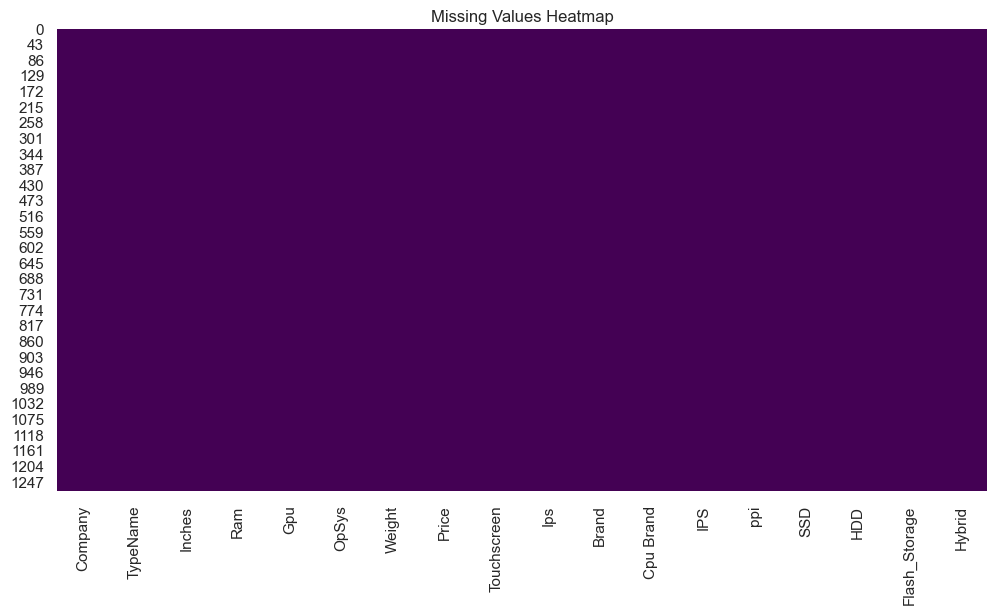

In [31]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values)

# Visualize missing values (optional, using a heatmap)
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


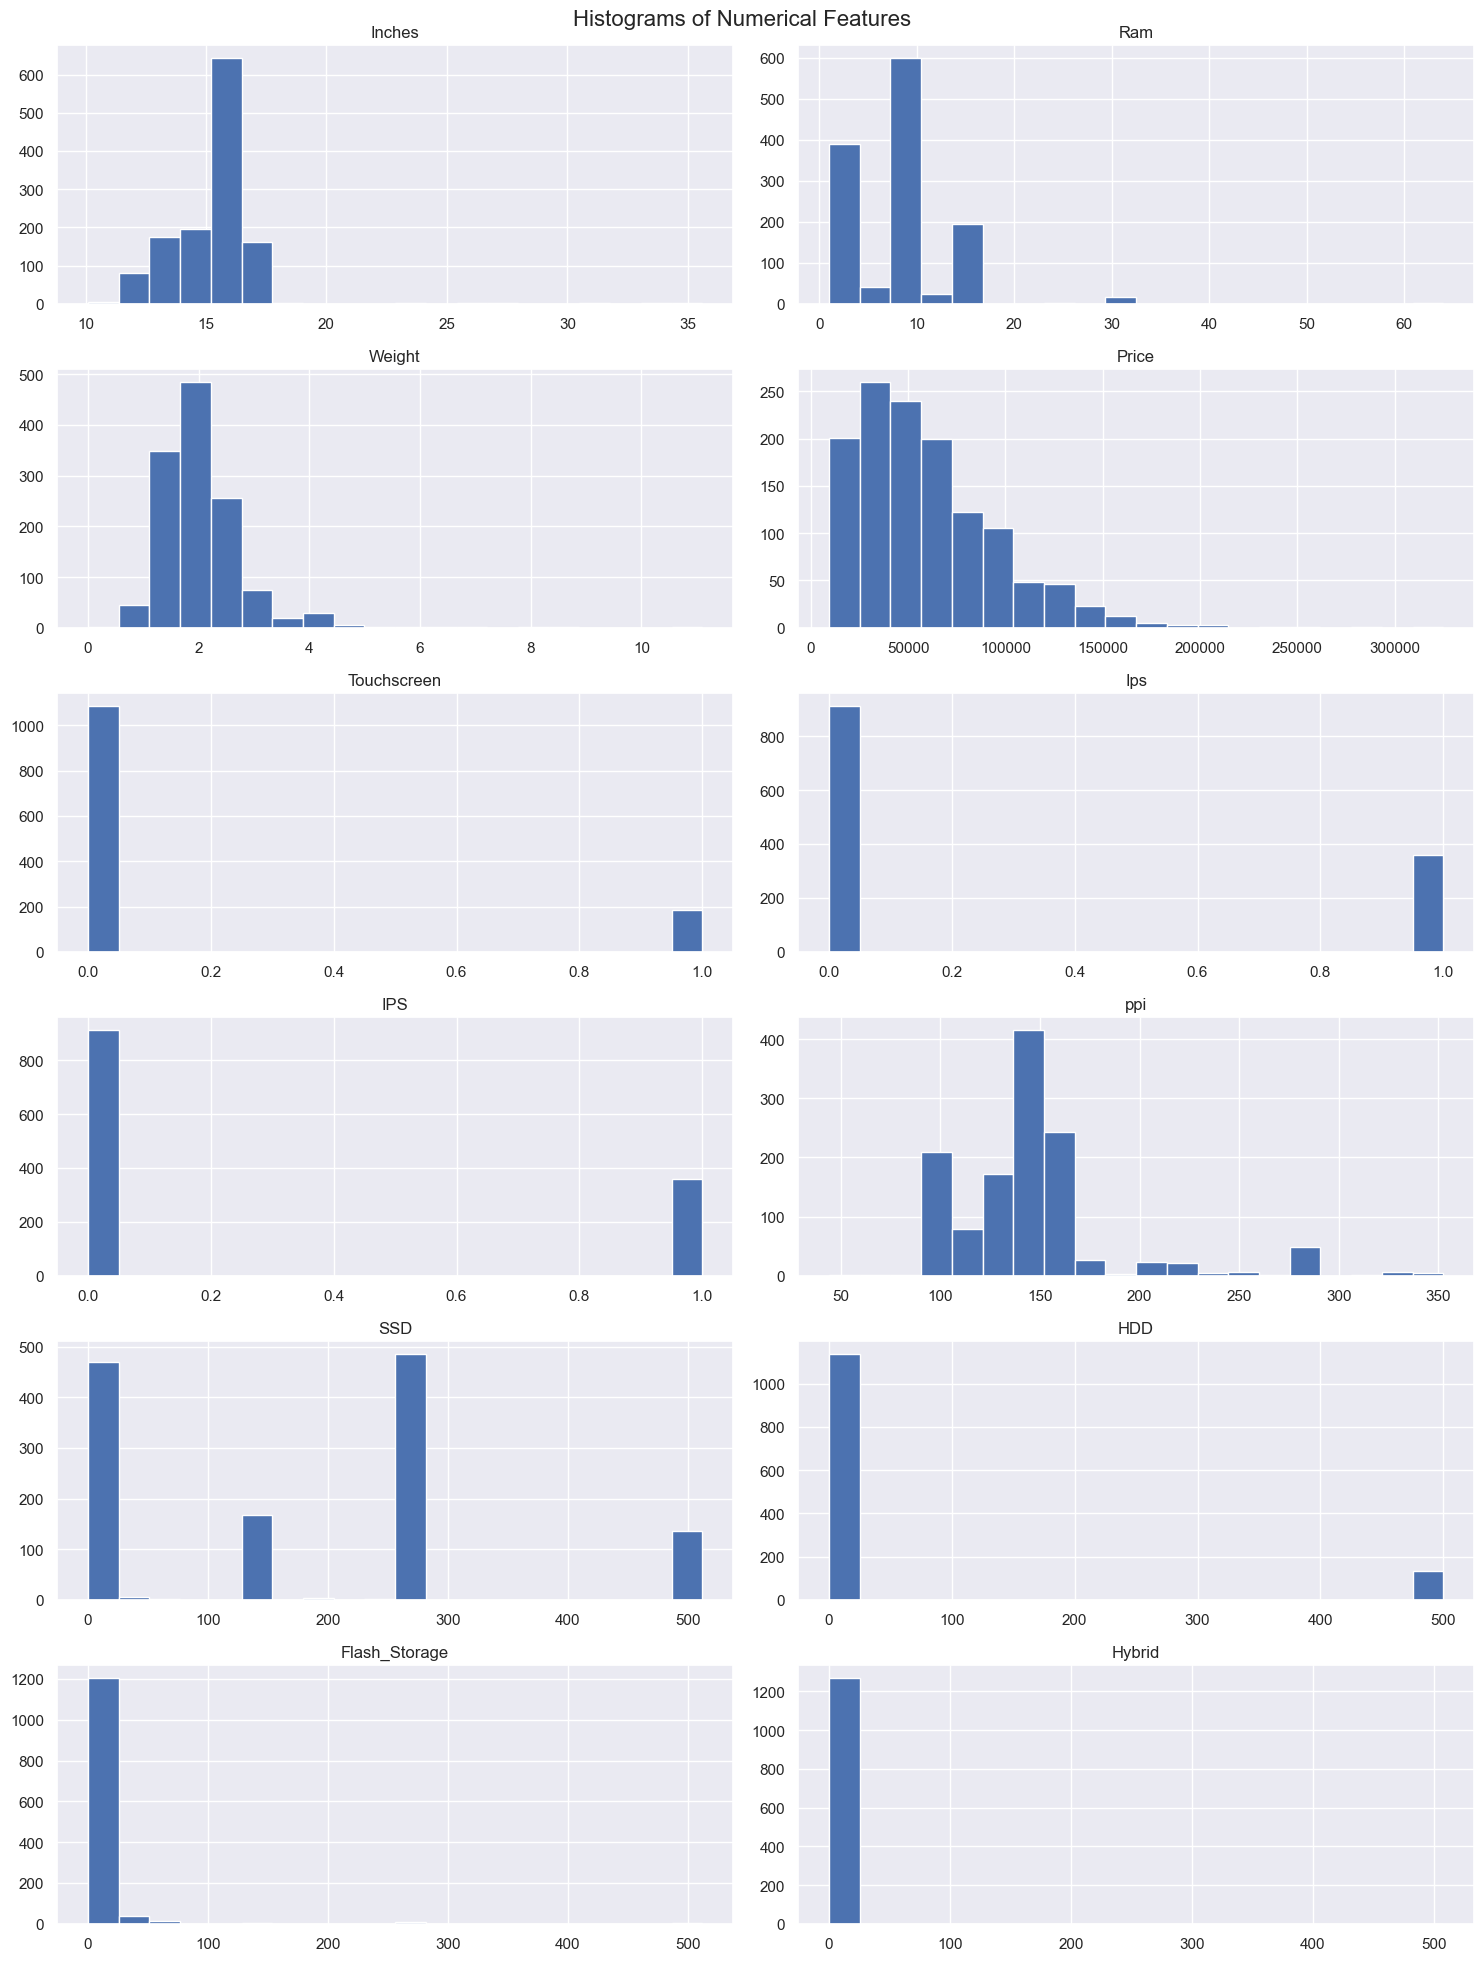

In [34]:
# Plot histograms for numerical features with 2 in each row
df.hist(bins=20, figsize=(15, 20), layout=(6, 2))
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout()  # Adjust spacing between plots for better readability
plt.show()


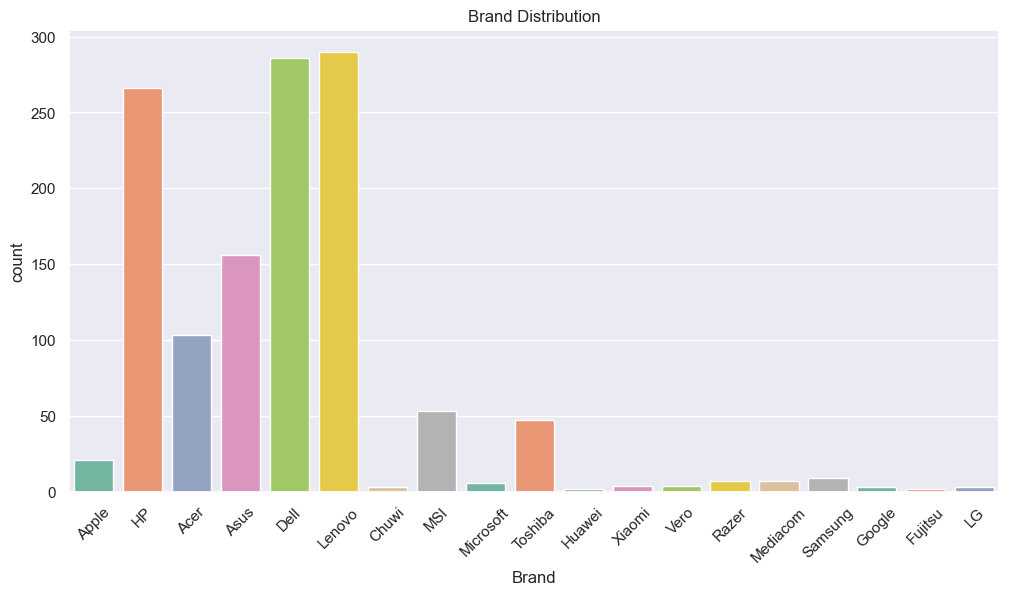

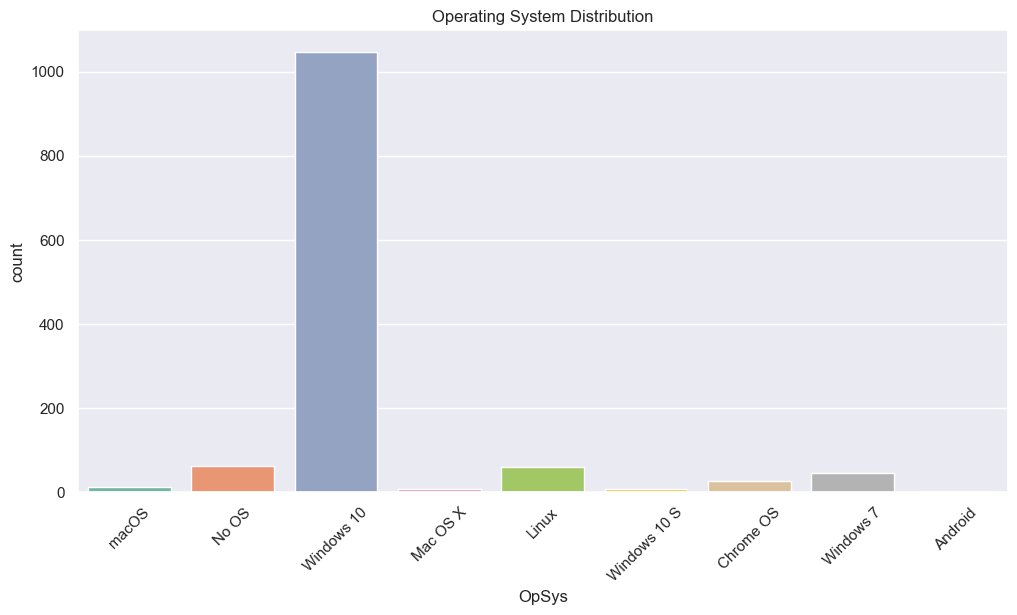

In [36]:
# Count plot for categorical variables (Brand, OpSys, Gpu, etc.)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Brand', hue='Brand', palette='Set2', legend=False)
plt.title('Brand Distribution')
plt.xticks(rotation=45)
plt.show()

# Plot for another categorical column, e.g., OpSys
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='OpSys', hue='OpSys', palette='Set2', legend=False)
plt.title('Operating System Distribution')
plt.xticks(rotation=45)
plt.show()


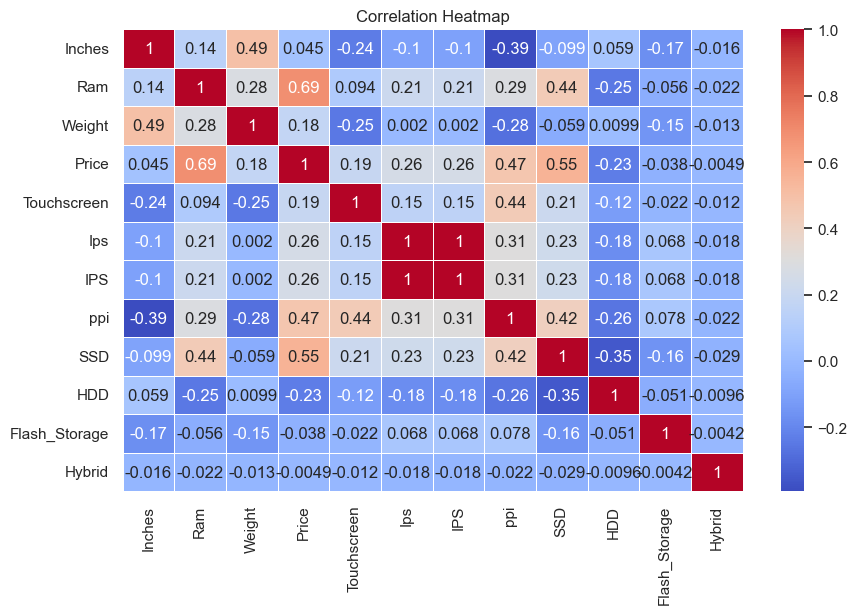

In [38]:
# Select only numerical columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix for numerical columns
corr_matrix = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


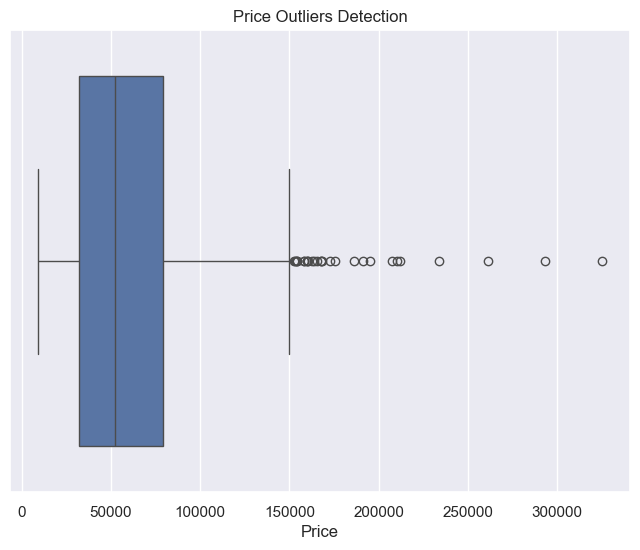

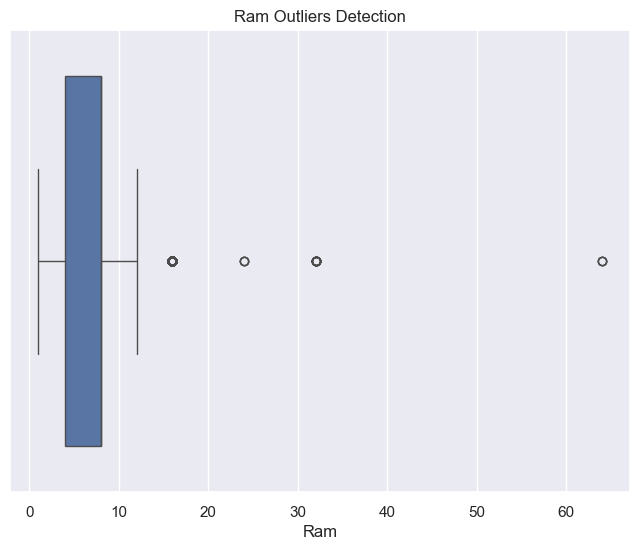

In [39]:
# Boxplot for Price to detect outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Price')
plt.title('Price Outliers Detection')
plt.show()

# Boxplot for Ram
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Ram')
plt.title('Ram Outliers Detection')
plt.show()


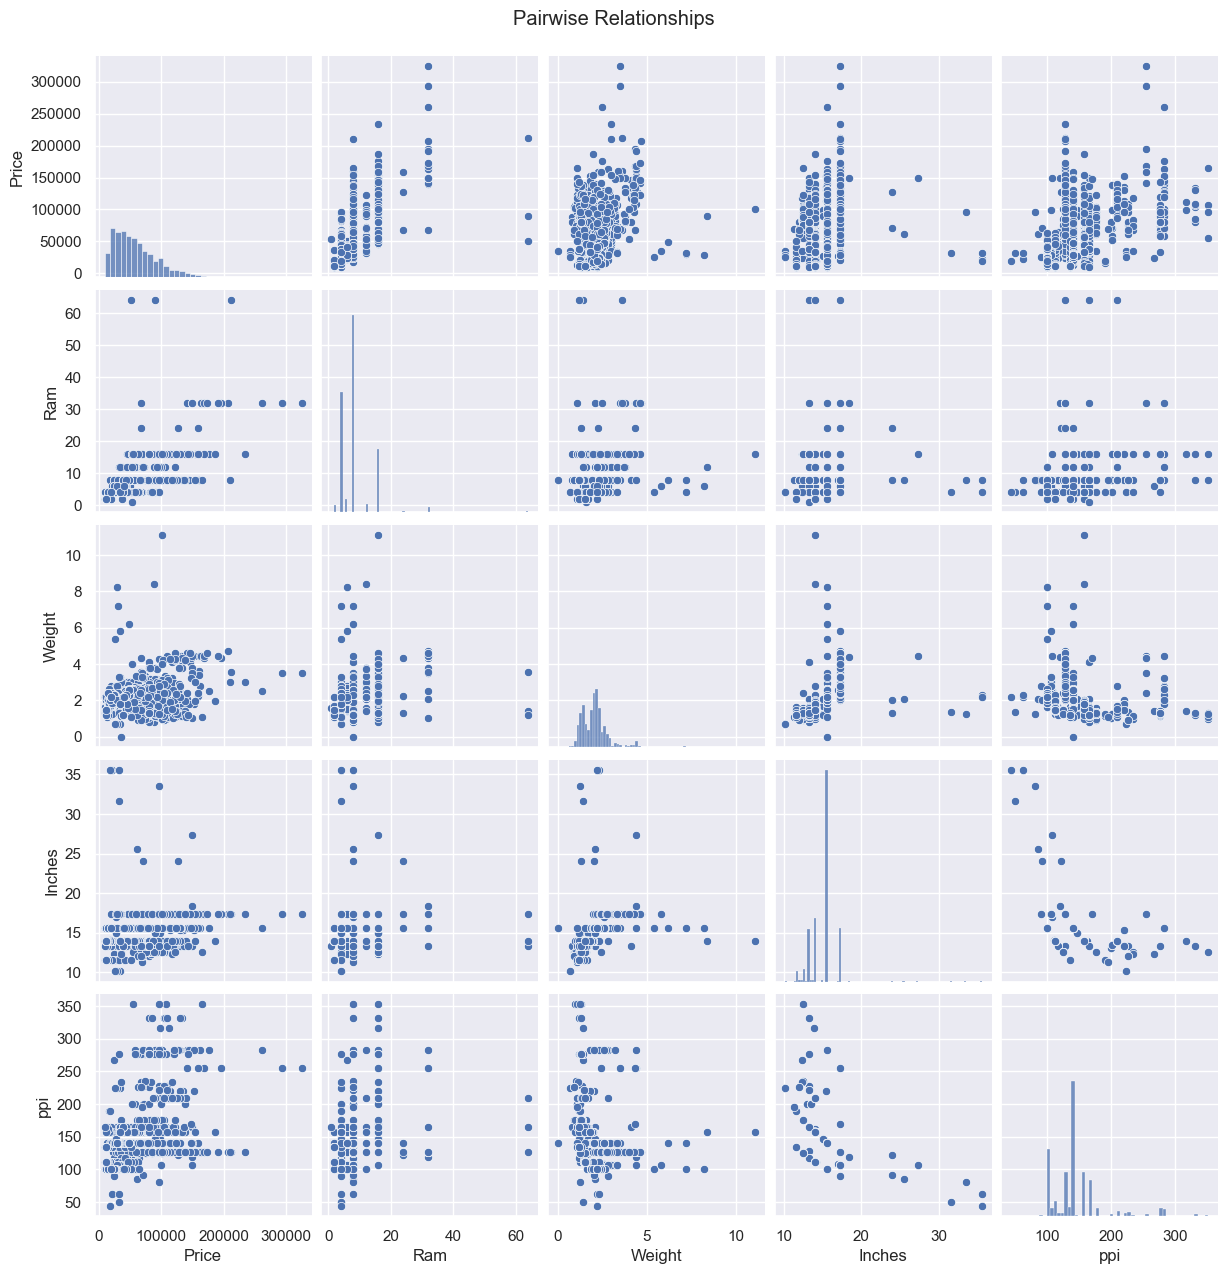

In [40]:
# Pairplot for numerical columns
sns.pairplot(df[['Price', 'Ram', 'Weight', 'Inches', 'ppi']])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()


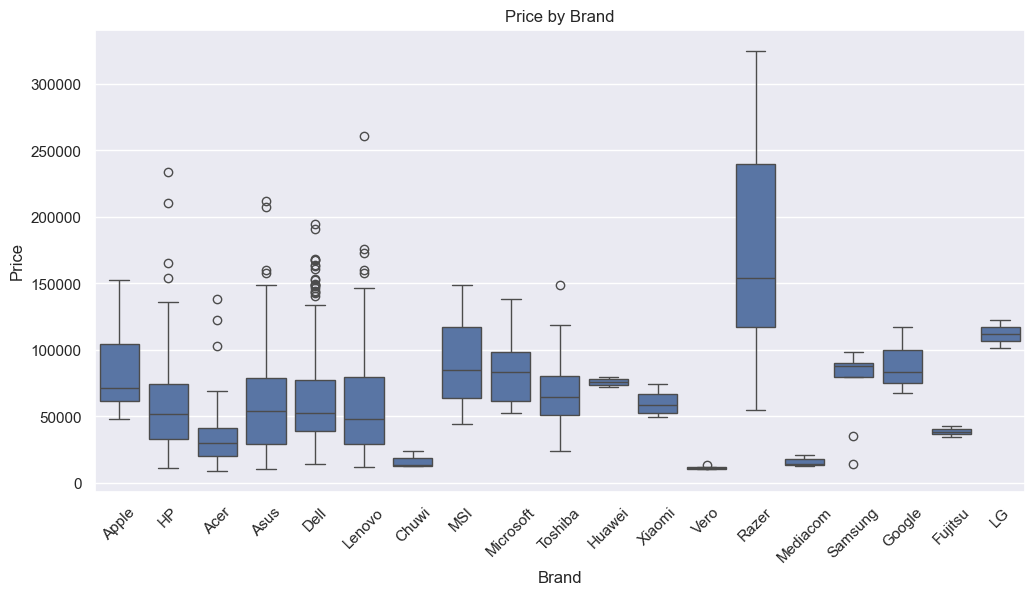

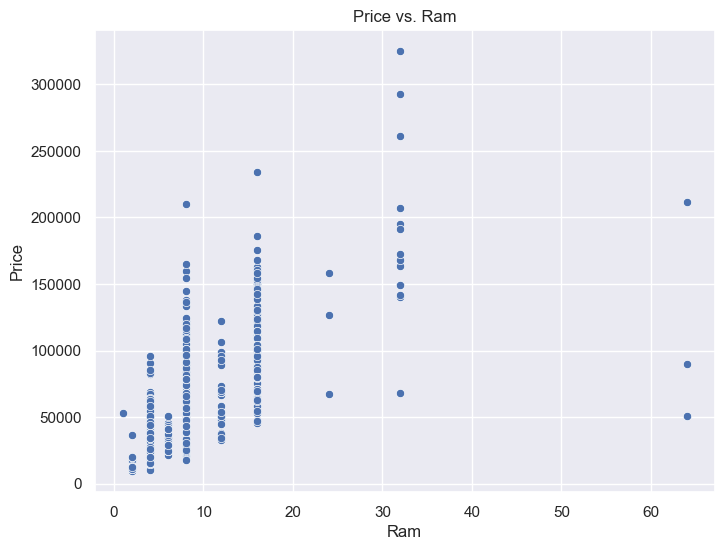

In [41]:
# Price vs. Brand
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Brand', y='Price')
plt.title('Price by Brand')
plt.xticks(rotation=45)
plt.show()

# Price vs. Ram
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Ram', y='Price')
plt.title('Price vs. Ram')
plt.show()


**EDA QUESTIONS**

**1. Which brands are the most common in the dataset?**

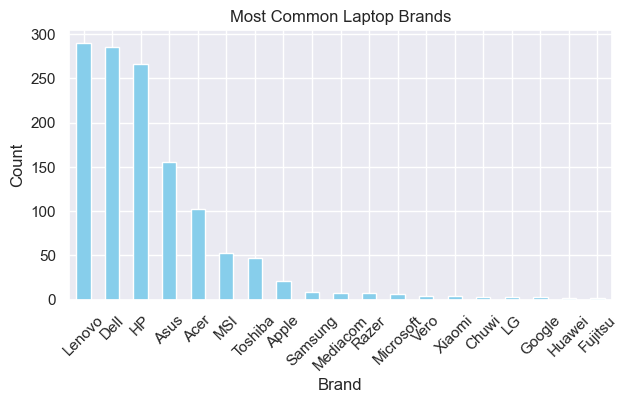

In [43]:
# Count of laptops by brand
df['Brand'].value_counts().plot(kind='bar', figsize=(7, 3.5), color='skyblue')
plt.title('Most Common Laptop Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


**2. How much RAM do most laptops have?**

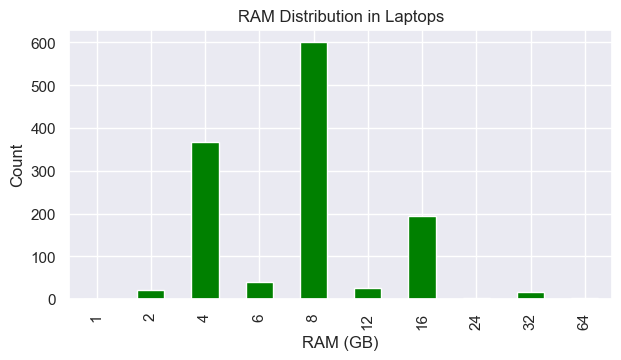

In [48]:
df['Ram'].value_counts().sort_index().plot(kind='bar', figsize=(7, 3.5), color='green')
plt.title('RAM Distribution in Laptops')
plt.xlabel('RAM (GB)')
plt.ylabel('Count')
plt.show()

**3. What kind of storage combinations are common (SSD, HDD, Hybrid)?**

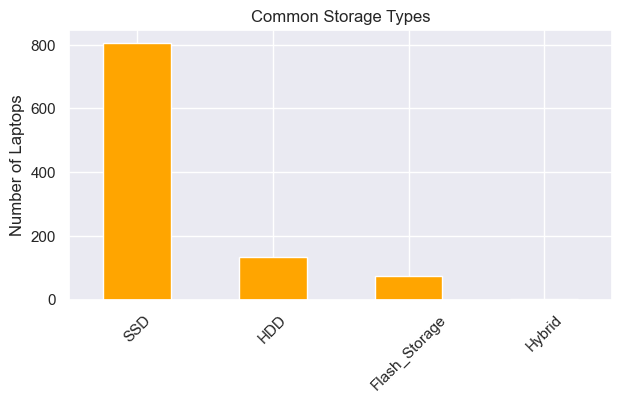

In [45]:
storage_types = df[['SSD', 'HDD', 'Flash_Storage', 'Hybrid']].astype(bool).sum()
storage_types.plot(kind='bar', figsize=(7, 3.5), color='orange')
plt.title('Common Storage Types')
plt.ylabel('Number of Laptops')
plt.xticks(rotation=45)
plt.show()


**4. How does laptop price vary with features like RAM or Brand?**

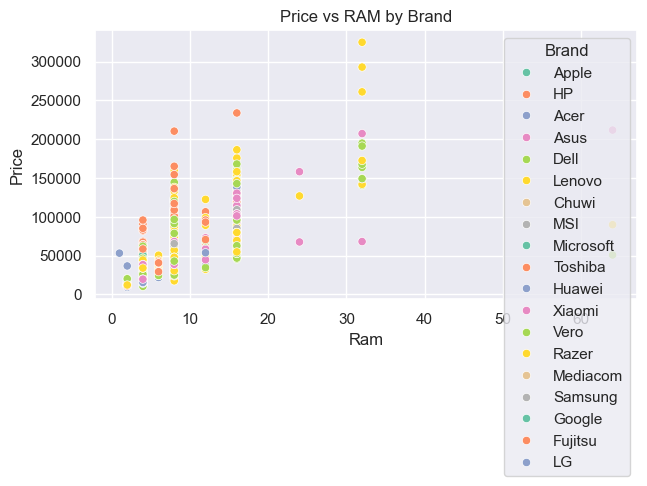

In [46]:
sns.scatterplot(data=df, x='Ram', y='Price', hue='Brand', palette='Set2')
plt.gcf().set_size_inches(7, 3.5)
plt.title('Price vs RAM by Brand')
plt.show()


**5. Which numerical features are most correlated with Price?**

In [47]:
correlation = df.corr(numeric_only=True)['Price'].sort_values(ascending=False)
print(correlation)


Price            1.000000
Ram              0.686675
SSD              0.554228
ppi              0.469435
IPS              0.256131
Ips              0.256131
Touchscreen      0.189851
Weight           0.176686
Inches           0.044681
Hybrid          -0.004902
Flash_Storage   -0.038167
HDD             -0.234538
Name: Price, dtype: float64
